In [35]:
# step 1 import all the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
#  step 2 upload data
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
# find the missing values 
data.isnull().count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [38]:
# Droping the column 
# for droping the column permanently use inplace=True
data.drop(columns='Id', inplace=True)

In [39]:
#.count() is use to count the number of rows 
data['Species'].count()

150

In [40]:
# .value-count() is used for count all the value inside the column
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

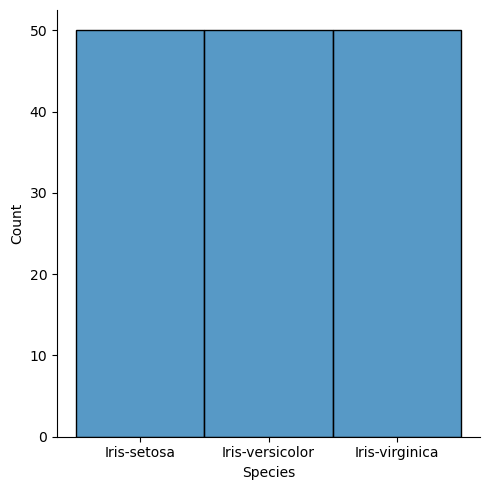

In [41]:
# we are using a bar chat to visualizing the target class
sns.displot(data['Species'])

In [42]:
# we are separating the data set between features and target class
# .iloc is used to select specific rows and columns
X=data.iloc[:,:-1]

Y=data['Species']

X,Y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Ir

In [43]:
# we are doing normalizing by from sklearn import standardScaler()

#from sk.learnpreprocessing import StandardScaler 

#std=Standardscaler()
#Z=std.fit_transform(X)

#Z

In [44]:
#we are converting the numpy array to pandas

pd.DataFrame(X)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
# we have string in target class we will replace string with numbers

Y.replace('Iris-setosa', 0, inplace=True)
Y.replace('Iris-versicolor', 1, inplace=True)
Y.replace('Iris-virginica', 2, inplace=True)

In [46]:
Y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [47]:
# we are splitting the entire data into train and test from sklearn model selection by importing train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=0)

In [48]:
X_test.shape

(30, 4)

In [49]:
# we are training our model by using SGD classifier

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)

SGDClassifier()

In [50]:
# we are predicting a new value and it should the target

Y= sgd.predict(X_test)
Y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
#we are comparing here with the X_test
#ndarray is command to display the output in horizontal way

np.ndarray(Y_test)

array([], shape=(2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0),
      dtype=float64)

In [52]:
# we are using sklearn.metrics by importing accuracy_score to check the score

from sklearn.metrics import accuracy_score

ac = accuracy_score(y_true=Y_test, y_pred=Y)
ac

0.9333333333333333

In [53]:
# we are using sklearn.metrics by importing confusion_matrix for comparing actual value 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=Y)
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]], dtype=int64)

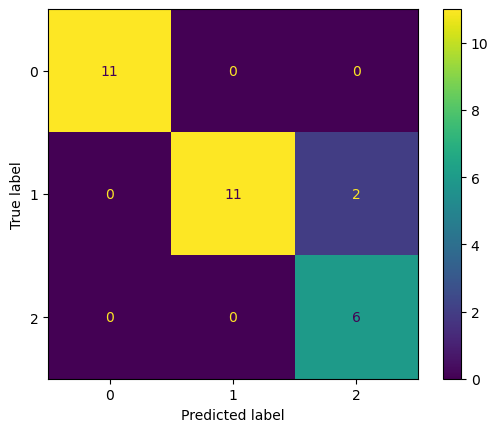

In [54]:
# we are displaying the confusion matrix output in diagram

from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [55]:
# we are using sklearn.linear_model by importing logistic regression for model to train the data set

from sklearn.linear_model import LogisticRegression

log= LogisticRegression()
log.fit(X_train, Y_train) 

c:\Users\wel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# here we are predicting x_test

y_pred_log = log.predict(X_test)

In [58]:
accuracy_score(y_true=Y_test, y_pred=y_pred_log)

1.0

In [60]:
cm_log = confusion_matrix(y_true=Y_test, y_pred=y_pred_log)
cm_log

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

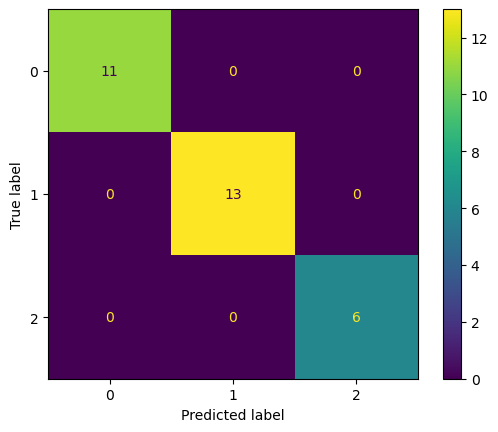

In [61]:
cm_log =  ConfusionMatrixDisplay(cm_log)
cm_log.plot()